In [1]:
#%matplotlib notebook
import numpy as np
# 高速化用
from numba import njit, f8, i8, b1, void, prange
# 実行時間測定用
import time
# 近似曲線の描画
from scipy.interpolate import interp1d
# グラフ化用
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import ScalarFormatter
import datetime
import pytz

In [2]:
@njit(cache=True, parallel=True)
def count_function(n_count, R, distance_array, data_array, x, y, z):
    for h in distance_array:
        count = 0
        for i in prange(n_count):
            if(z[i] > 0):
                a = (h/z[i])*x[i]
                b = (h/z[i])*y[i]
                s = np.sqrt(a**2 + b**2)
                if(s < R):
                    count += 1
        data_array[int(h-1)] = count

In [3]:
n_count = 10**7
distance = 2.0
h_max = 50
h_min = 1
R = 1.0*distance

In [4]:
# https://www.headboost.jp/how-to-create-an-array/#index_id3
distance_array = np.linspace(h_min, h_max, num=h_max, endpoint=True)
data_array = np.zeros(len(distance_array))

In [5]:
distance_array

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [6]:
len(data_array)

50

In [7]:
np.random.seed(0)
theta = np.arccos(1-2*np.random.rand(n_count))
r = np.sin(theta)
eta = 2*np.pi*np.random.rand(n_count)

In [8]:
x = np.cos(theta)
y = r * np.sin(eta)
z = r * np.cos(eta)

In [9]:
count_function(n_count, R, distance_array, data_array, x, y, z)

In [10]:
# https://liginc.co.jp/566229
curv_fit = interp1d(distance_array, data_array, kind = 'cubic')
new_distance = np.linspace(h_min, h_max, num=100, endpoint=True)

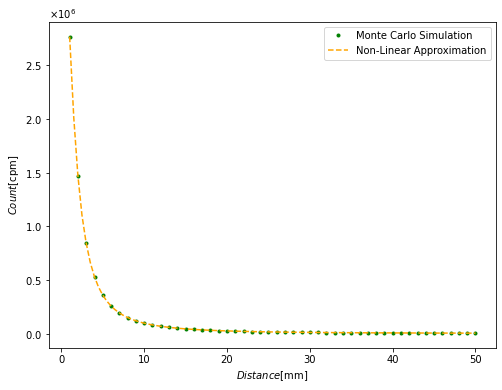

In [11]:
# グラフ化用
fig = plt.figure(
    figsize = (8, 6),
    facecolor = 'white'
)
# グラフの背景色の設定
ax = fig.add_subplot(1, 1, 1)
# グラフ化用
ax.plot(distance_array, data_array, '.', label = 'Monte Carlo Simulation', color = 'green')
ax.plot(new_distance, curv_fit(new_distance), '--', label = 'Non-Linear Approximation', color = 'orange')

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

# ラベルの設定
ax.set_xlabel(r"$Distance$[mm]")
ax.set_ylabel(r"$Count$[cpm]")
# 凡例の設定
ax.legend(loc = 'best')

In [12]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)

#見やすい形に変換
time = time.strftime('%m%d_monte_1025kadai_2.png')
# 図の保存
fig.savefig(time, facecolor = fig.get_facecolor())